In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_products.csv
/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_categories.csv


In [16]:
amazon_cats = pd.read_csv('/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_categories.csv')
amazon_prods = pd.read_csv('/kaggle/input/amazon-products-dataset-2023-1-4m-products/amazon_products.csv')

In [17]:
amazon_cats.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [18]:
amazon_prods.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


Going to join both datasets

In [23]:
#amazon_cats = amazon_cats.drop('id',axis=1)
amazon = pd.concat([amazon_prods,amazon_cats],axis=1,keys=['Products','Categories'])

In [24]:
amazon.head()

Products                                                     \
         asin                                              title   
0  B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...   
1  B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...   
2  B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...   
3  B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...   
4  B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...   

                                                      \
                                              imgUrl   
0  https://m.media-amazon.com/images/I/815dLQKYIY...   
1  https://m.media-amazon.com/images/I/81bQlm7vf6...   
2  https://m.media-amazon.com/images/I/71EA35zvJB...   
3  https://m.media-amazon.com/images/I/91k6NYLQyI...   
4  https://m.media-amazon.com/images/I/61NJoaZcP9...   

                                                                         \
                             productURL stars reviews   price listPrice   
0  https://www.amazon.com/dp/B014TMV5YE   4.5       0  139.99      0.00   
1  https://www.amazon.com/dp/B07GDLCQXV   4.5       0  169.99    209.99   
2  https://www.amazon.com/dp/B07XSCCZYG   4.6       0  365.49    429.99   
3  https://www.amazon.com/dp/B08MVFKGJM   4.6       0  291.59    354.37   
4  https://www.amazon.com/dp/B01DJLKZBA   4.5       0  174.99    309.99   

                                                                    Categories  
  category_id isBestSeller boughtInLastMonth                     category_name  
0         104        False              2000          Beading & Jewelry Making  
1         104        False              1000                 Fabric Decorating  
2         104        False               300       Knitting & Crochet Supplies  
3         104        False               400              Printmaking Supplies  
4         104        False               400  Scrapbooking & Stamping Supplies

In [26]:
amazon.columns = amazon.columns.droplevel()
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
 11  category_name      248 non-null      object 
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 121.1+ MB


There are 6 numerical columns; going to group them.

In [27]:
amazon_num = amazon.select_dtypes(exclude='object')

In [69]:
amazon_num.describe()

,stars,reviews,price,listPrice,category_id,boughtInLastMonth
count,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06
mean,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,1.419823e+02
std,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,8.362720e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05


Text(0.5, 1.0, 'Correlations')

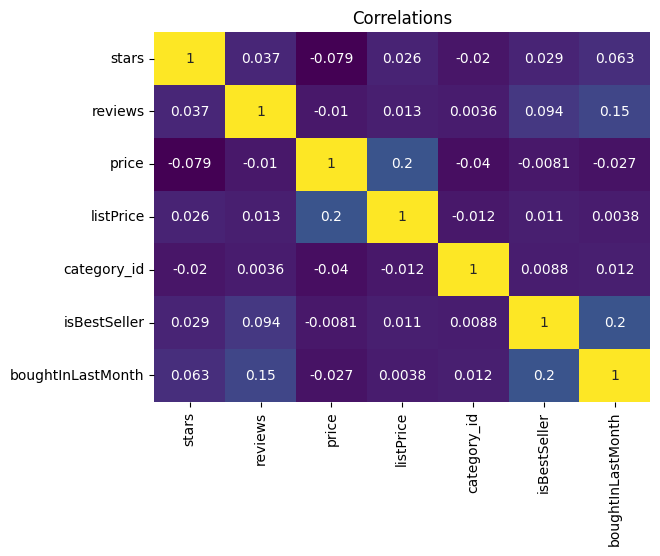

In [32]:
sns.heatmap(amazon_num.corr(),annot=True,cmap='viridis',cbar=False)
plt.title('Correlations')

There are no strong correlations.

Checking for missing data.

Text(0.5, 1.0, 'Missing Values')

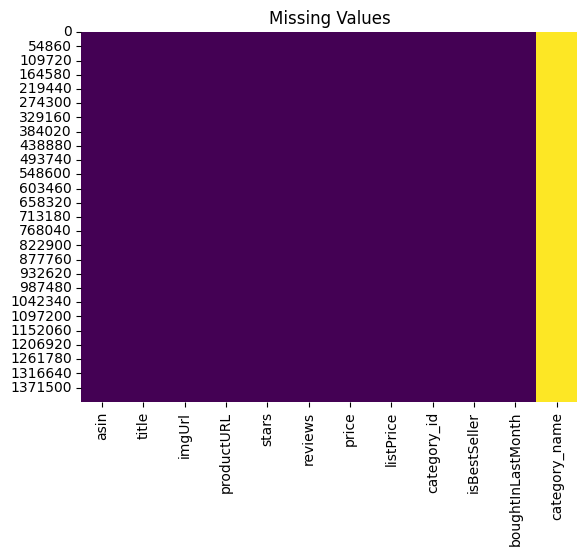

In [33]:
sns.heatmap(amazon.isnull(),cmap='viridis',cbar=False)
plt.title('Missing Valuesb')

missing values in category_name column.

In [35]:
amazon.isnull().sum()

asin                       0
title                      1
imgUrl                     0
productURL                 0
stars                      0
reviews                    0
price                      0
listPrice                  0
category_id                0
isBestSeller               0
boughtInLastMonth          0
category_name        1426089
dtype: int64

Too many missing values in that column; dropping it.

In [39]:
amazon = amazon.dropna(thresh=1000,axis=1)
#if there are 1000 non-null values keep the column

In [40]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


In [44]:
amazon['stars'].mean()

3.9995118264477476

In [49]:
amazon['price'].value_counts(bins=10)

price
(-19.733, 1973.181]       1425386
(1973.181, 3946.362]          759
(3946.362, 5919.543]          127
(5919.543, 7892.724]           42
(7892.724, 9865.905]           12
(9865.905, 11839.086]           5
(11839.086, 13812.267]          3
(17758.629, 19731.81]           2
(15785.448, 17758.629]          1
(13812.267, 15785.448]          0
Name: count, dtype: int64

Majority of the prices are below 2000

In [56]:
reviews = amazon['reviews'].value_counts().reset_index()

In [59]:
reviews[reviews['reviews']>100].count()

reviews    11760
count      11760
dtype: int64

In [60]:
amazon[amazon['price']<2000]['reviews'].value_counts()

reviews
0        1129696
1          11614
2           8532
3           6683
4           5537
          ...   
18954          1
10503          1
8385           1
26800          1
13269          1
Name: count, Length: 11861, dtype: int64

In [62]:
amazon[amazon['reviews']>0]['price'].value_counts(bins=10)

price
(-11.998999999999999, 1199.8]    295657
(1199.8, 2399.6]                    131
(2399.6, 3599.4]                     28
(3599.4, 4799.2]                     11
(4799.2, 5999.0]                      4
(5999.0, 7198.8]                      2
(10798.2, 11998.0]                    1
(7198.8, 8398.6]                      0
(8398.6, 9598.4]                      0
(9598.4, 10798.2]                     0
Name: count, dtype: int64

<Axes: xlabel='isBestSeller'>

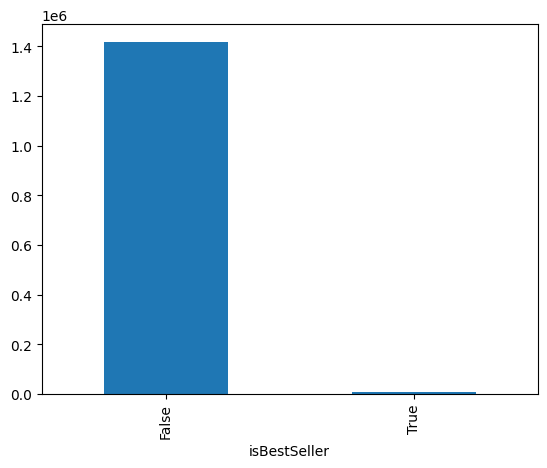

In [64]:
amazon['isBestSeller'].value_counts().plot.bar()

In [65]:
amazon[amazon['isBestSeller']==True]['reviews'].value_counts()

reviews
0        6965
1           5
101         5
349         4
5           4
         ... 
11476       1
14317       1
6772        1
4092        1
95          1
Name: count, Length: 1393, dtype: int64

Not much of a connection between best-sellers and reviews.

In [67]:
amazon[amazon['isBestSeller']==True]['price'].value_counts()

price
9.99     392
19.99    270
29.99    195
14.99    191
8.99     181
        ... 
3.80       1
95.99      1
47.60      1
11.35      1
35.41      1
Name: count, Length: 2051, dtype: int64

In [70]:
amazon.columns

Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth'],
      dtype='object')

In [73]:
amazon[['listPrice','price']].value_counts()

listPrice  price
0.00       9.99     42982
           0.00     32723
           19.99    31553
           11.99    24874
           12.99    24520
                    ...  
24.00      18.92        1
           18.85        1
           18.80        1
           18.75        1
28.43      26.54        1
Name: count, Length: 163614, dtype: int64

In [76]:
amazon[['listPrice','stars']].value_counts().head(10)

listPrice  stars
0.0        4.6      132436
           4.5      127675
           0.0      115716
           4.7      110612
           4.4      104378
           4.3       82627
           5.0       77918
           4.2       60363
           4.8       60157
           4.1       43663
Name: count, dtype: int64

Products with listing price of 0.0 are more prominent and have good ratings.

In [79]:
amazon['boughtInLastMonth'].value_counts().sort_index()

boughtInLastMonth
0         917620
50        157252
100       132404
200        62460
300        36196
400        22887
500        15996
600        11983
700         9133
800         7127
900         5925
1000       26967
2000        8567
3000        4065
4000        2207
5000        1364
6000         917
7000         625
8000         480
9000         390
10000       1295
20000        297
30000         76
40000         39
50000         27
60000         10
70000          8
80000          4
90000          4
100000        12
Name: count, dtype: int64

Checking products that weren't bought last month.

In [81]:
amazon[amazon['boughtInLastMonth']==0]['stars'].value_counts()

stars
0.0    125095
4.5     97171
4.6     96112
5.0     83445
4.4     82104
4.7     75984
4.3     66994
4.2     52070
4.8     42098
4.1     38664
4.0     36924
3.9     22347
3.8     17229
4.9     13687
3.7     12395
3.6      9792
3.5      8883
3.0      6397
3.4      5852
3.3      4747
1.0      4115
3.2      3267
3.1      2735
2.0      1872
2.9      1670
2.8      1170
2.7      1074
2.5      1074
2.6       724
2.4       458
2.3       345
2.2       268
2.1       243
1.5       193
1.9       121
1.8        97
1.7        73
1.4        53
1.6        45
1.3        29
1.2         4
Name: count, dtype: int64

In [82]:
amazon[amazon['boughtInLastMonth']>0]['stars'].value_counts()

stars
4.6    86600
4.5    77874
4.7    77565
4.4    60700
4.3    45268
4.8    41193
4.2    28968
4.1    19333
4.0    14231
5.0    11395
3.9     9067
4.9     8638
3.8     6478
0.0     5928
3.7     4029
3.6     2729
3.5     2197
3.4     1477
3.3     1018
3.0      927
3.2      691
3.1      536
1.0      315
2.9      270
2.8      229
2.0      200
2.7      195
2.5      163
2.6      137
2.4       84
2.3       60
2.2       59
1.5       37
2.1       37
1.9       25
1.8       16
1.7       15
1.6       15
1.4        9
1.3        7
1.2        2
Name: count, dtype: int64

In [83]:
g_zero = amazon[amazon['boughtInLastMonth']>0]['stars'].value_counts()

getting the mean of stars of products bought last month.

In [84]:
np.average(g_zero.index,weights=g_zero.values)

4.406338298110737

products that were bought in the previous month have a high average rating of 4.4

In [85]:
e_zero = amazon[amazon['boughtInLastMonth']==0]['stars'].value_counts()

In [86]:
np.average(e_zero.index,weights=e_zero.values)

3.773972341492121

products that weren't bought in the previous month have a lower average rating of 3.77

In [91]:
amazon[amazon['boughtInLastMonth']==0]['reviews'].value_counts().sort_index()

reviews
0         732229
1          10724
2           7724
3           5949
4           4880
           ...  
157255         1
173248         1
174524         1
177760         1
260659         1
Name: count, Length: 6601, dtype: int64

In [92]:
#reviews of products not bought in the previous month
re_zero = amazon[amazon['boughtInLastMonth']==0]['reviews'].value_counts().sort_index()

In [93]:
np.average(re_zero.index,weights=re_zero.values)

91.11200387960157

In [96]:
#reviews of products bought in the previous month
rg_zero = amazon[amazon['boughtInLastMonth']>0]['reviews'].value_counts().sort_index()

In [97]:
np.average(rg_zero.index,weights=rg_zero.values)

342.4406595415526

The average number of reviews and star ratings of products bought in the previous month are greater than those of products not bought in the previous month.